## Data Augmentation in NLP

The more data we have, the better performance we can achieve. However, it is very too luxury to annotate a large amount of training data. Therefore, proper data augmentation is useful to boost up your model performance. Augmentation is very popular in the computer vision area. Image can be augmented easily by flipping, adding salt, etc via image augmentation libraries such as imgaug. It is proved that augmentation is one of the anchors to the success of computer vision models.

In the natural language processing (NLP) field, it is hard to augment text due to the high complexity of language. Not every word we can replace it with others such as a, an, the. Also, not every word has a synonym. Even changing a word, the context will be totally different. On the other hand, generating an augmented image in the computer vision area is relatively easier. Even introducing noise or cropping out a portion of the image, the model can still classify the image.

Given that we do not have an unlimited resource to build training data by humans, authors tried different methods to achieve the same goals which are generating more data for model training. In this story, we explore different authors how they leverage augmentation to tickle NLP tasks via generating more text data to boost up the models. The following story will cover:

- **Thesaurus**
- **Word Embeddings**
- **Back Translation**
- **Contextualized Word Embeddings**
- **Text Generation**

### 1 - Thesaurus 

Zhang et al. introduced synonyms Character-level Convolutional Networks for Text Classification. During the experiment, they found that one of the useful ways to do text augmentation is by replacing words or phrases with their synonyms. Leveraging existing thesaurus help to generate lots of data in a short time. Zhang et al. select a word and replace it with synonyms according to the geometric distribution.

### 2 - Word Embeddings

Wang and Yang introduced word similar calculation in That’s So Annoying!!!: A Lexical and Frame-Semantic Embedding Based Data Augmentation Approach to Automatic Categorization of Annoying Behaviors using #petpeeve Tweets. In the paper, Wang and Yang proposed to use k-nearest-neighbor (KNN) and cosine similarity to find the similar word for replacement.

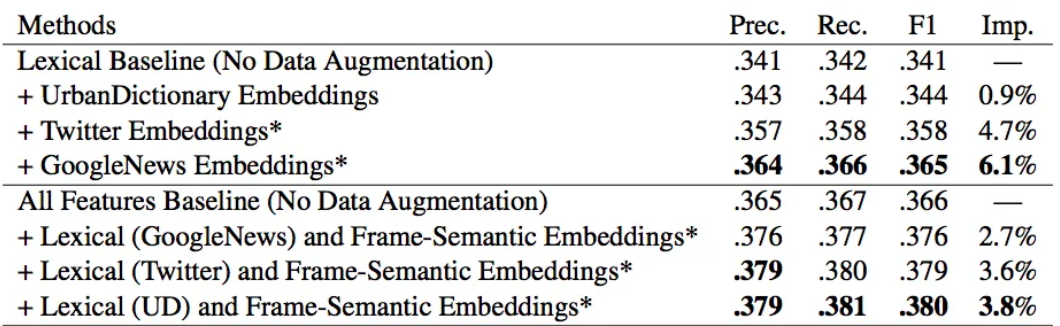

Alternatively, we can leverage pre-trained classic word embeddings such as word2vec, GloVe, and fasttext to perform similarity searches.

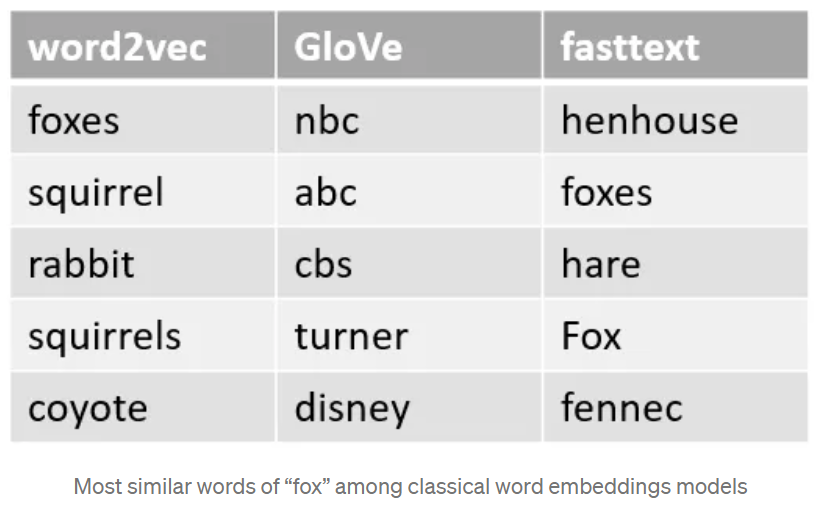

### 3 - Back translation

Back-translation is a technique used to address the issue of limited training data for certain languages in machine translation models. In the context of training a model to translate from English (source language) to Cantonese (target language), where there is insufficient training data available for Cantonese, back-translation can be employed.

The process involves translating sentences from the target language (Cantonese) back into the source language (English). These back-translated sentences are then combined with the original source sentences, effectively increasing the amount of training data available for the translation model. By incorporating the back-translated sentences into the training set, the model can learn from a more diverse range of examples and potentially improve its performance in translating from English to Cantonese.

### 4 - Contextualized Word Embeddings

Contextualized word embeddings refer to word representations in natural language processing (NLP) that capture the context and meaning of words within a given context or sentence. Unlike traditional word embeddings such as word2vec or GloVe, which assign fixed vectors to words regardless of context, contextualized word embeddings generate dynamic word representations based on the surrounding words in a sentence.

One of the prominent models for contextualized word embeddings is the Transformer-based language model called BERT (Bidirectional Encoder Representations from Transformers), developed by Google. BERT takes into account the entire context of a word by considering both the left and right context in a bidirectional manner. By training on a large corpus of text data, BERT learns to generate word embeddings that are sensitive to the specific context in which a word appears.

### 5 - Text Generation

Text generation refers to the process of generating coherent and contextually relevant text using computational models. This task is a fundamental problem in natural language processing (NLP) and has seen significant advancements in recent years, thanks to the development of deep learning techniques, specifically language models such as GPT (Generative Pre-trained Transformer) and its variants.

## Data Augmentation using NLPaug

In the previous story, you understand different approaches to generate more training data for your NLP task model. In this story, we will learn how can you do it with just a few line codes.

### Introduction to nlpaug

After used imgaug in computer vision project, I am thinking whether we can have a similar library to generate synthetic data.Basic elements of nlpaug includes:

- **Characte**r: OCR Augmenter, QWERTY Augmenter and Random Character Augmenter
- **Word**: WordNet Augmenter, word2vec Augmenter, GloVe Augmenter, fasttext Augmenter, BERT Augmenter, Random Word Character
- **Flow**: Sequential Augmenter, Sometimes Augmenter

Intuitively, Character Augmenters and Word Augmenters are focusing on character level and word level manipulation respectively. Flow works as an orchestra the control augmentation flow.

#### 1- Character

Augmenting data in character level. Possible scenarios include image to text and chatbot. During recognizing text from image, we need to optical character recognition (OCR) model to achieve it but OCR introduces some errors such as recognizing “o” and “0”. In chatbot, we still have typo even though most of the application comes with word correction. To overcome this problem, you may let your model “see” those possible outcomes before online prediction.

- **OCR** :

When working on NLP problem, OCR results may be one of the inputs of your NLP problem. For example, “0” may be recognized as “o” or “O”. If you are using bag-of-words or classic word embeddings as a feature, you will get trouble as out-of-vocabulary (OOV) around you today and always. If you use state-of-the-art models such as BERT and GPT, the OOV issue seems resolved as word will be split to subword. However, some information is lost.

OCRAug is designed to simulate OCR error. It will replace the target character by pre-defined mapping table.

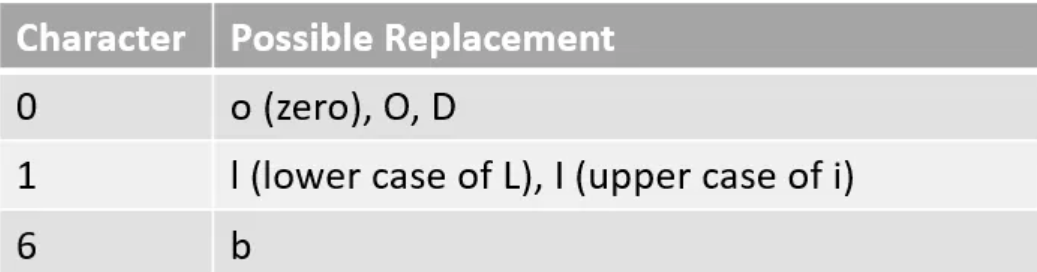

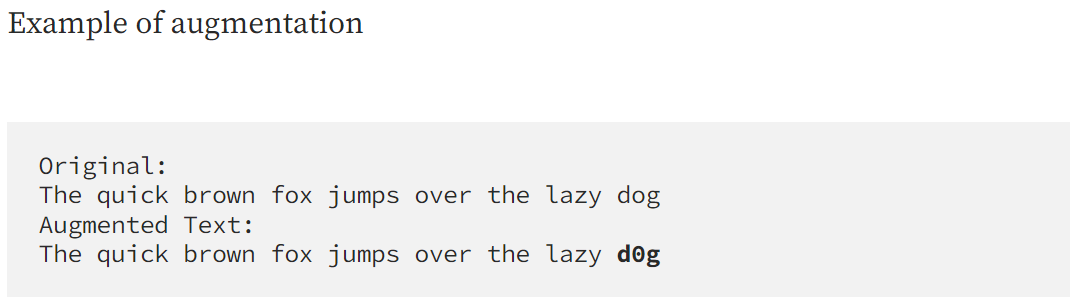

- **QWERTY** : 

Another project you may involve is chatbot or other messaging channels such as email. Although spell checking will be performed, some misspelled still exist. It may hurt your NLP model as mentioned before.

QWERTYAug is designed to simulate keyword distance error. It will replace the target character by 1 keyword distance. You can config whether include number or special character or not.

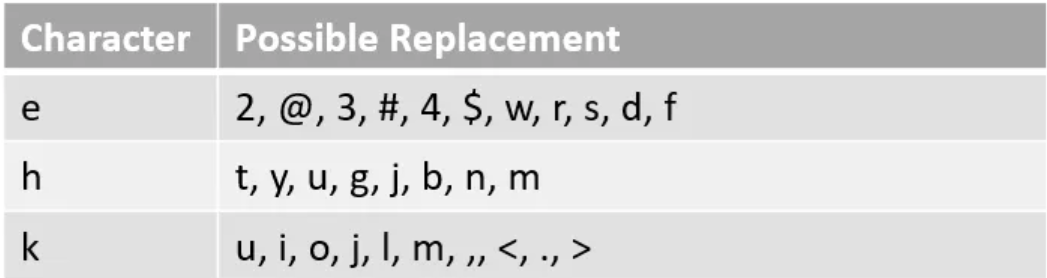

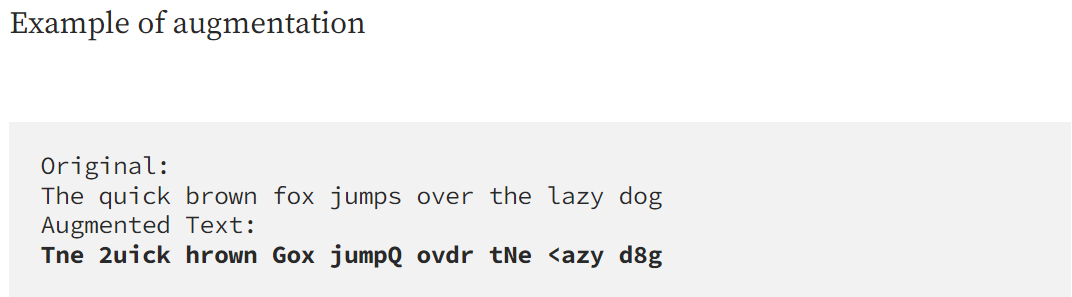

- **Random Character** : 

From different research, noise injection may help to generalized your NLP model sometimes. We may add some noise to your word such as adding or deleting one character from your word.

RandomCharAug is designed to inject noise into your data. Unlike OCRAug and QWERTYAug, it supports insertion, substitution, and insertion.

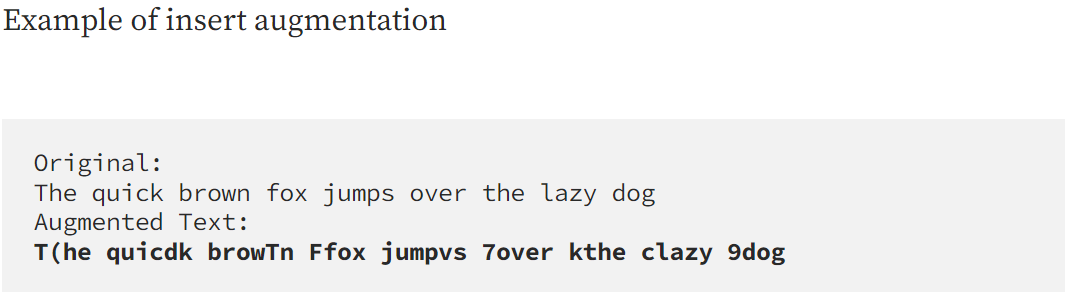


#### 2 - Word

Besides character augmentation, word level is important as well. We make use of word2vec (Mikolov et al., 2013), GloVe (Pennington et al., 2014), fasttext (Joulin et al., 2016), BERT(Devlin et al., 2018) and wordnet to insert and substitute similar word. Word2vecAug, GloVeAug and FasttextAug use word embeddings to find the most similar group of words to replace the original word. On the other hand, BertAug use language models to predict possible target words. WordNetAug use statistics way to find a similar group of words.

- **Word Embeddings (word2vec, GloVe, fasttext)** :

Classic embeddings use a static vector to present a word. Ideally, the meaning of the word is similar if vectors are near each other. Actually, it depends on the training data. For example, “rabbit” is similar to “fox” in word2vec while “nbc” is similar to “fox” in GloVe.

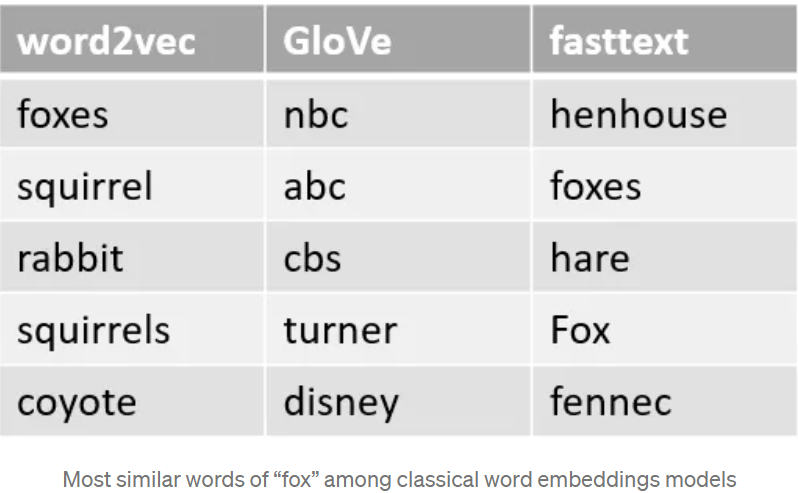

Sometimes, you want to replace words by similar words such that NLP model does not rely on a single word.Word2vecAug, GloVeAug andFasttextAug are designed to provide a “similar” word based on pre-trained vectors.

Besides substitution, insertion helps to inject noise into your data. It picks words from vocabulary randomly.

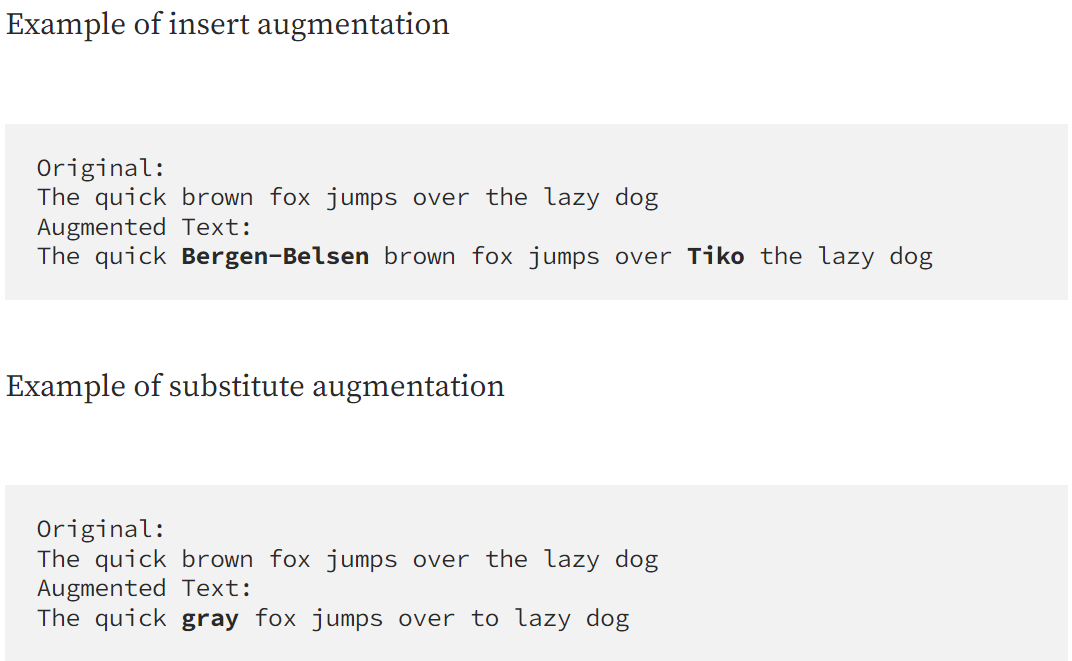

- **Contextualized Word Embeddings** : 

Since classic word embeddings use a static vector to represent the same word. It may not fit some scenarios. For “Fox” can represent as animal and broadcasting company. To overcome this problem, contextualized word embeddings is introduced to consider surrounding words to generate a vector under a different context.

BertAug is designed to provide this feature to perform insertion and substitution. Different from previous word embeddings, insertion is predicted by BERT language model rather than pick one word randomly. Substitution use surrounding words as a feature to predict the target word.

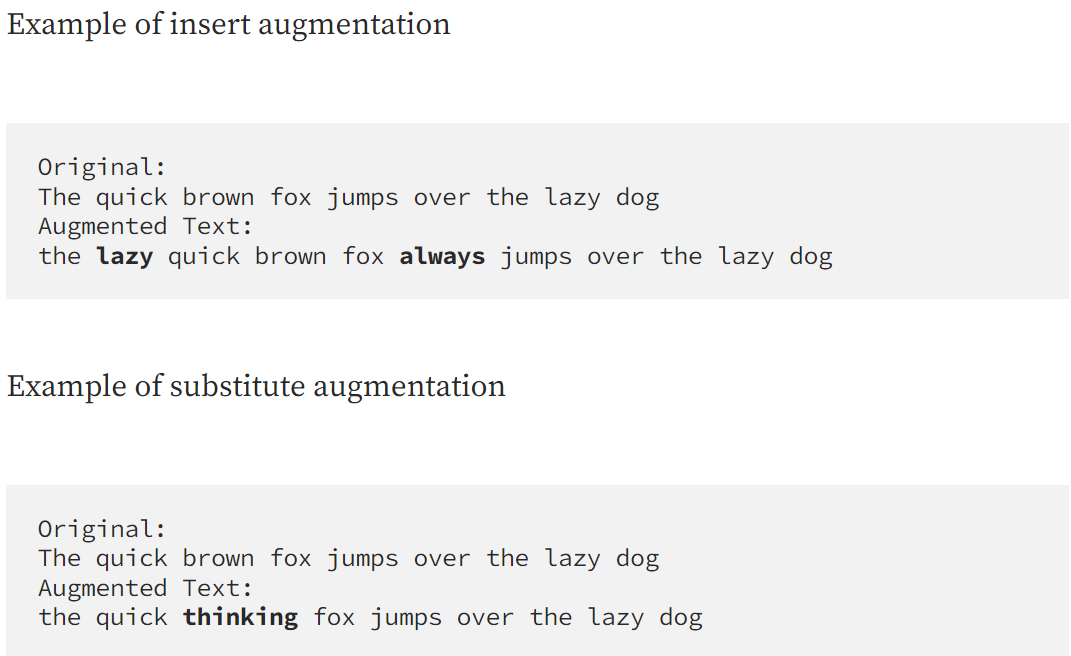

- **Synonym** : 

Besides the neural network approach, a thesaurus can achieve similar objectives. The limitation of synonym is that some words may not have similar words. WordNet from an awesome NLTK library helps to find the synonym words.

WordNetAug provides a substitution feature to replace the target word. Instead of finding synonyms purely, some preliminary checking makes sure that the target word can be replaced. Those rules are:

- Do not pick determiner (e.g. a, an, the)
- Do not pick a word that does not has a synonym.

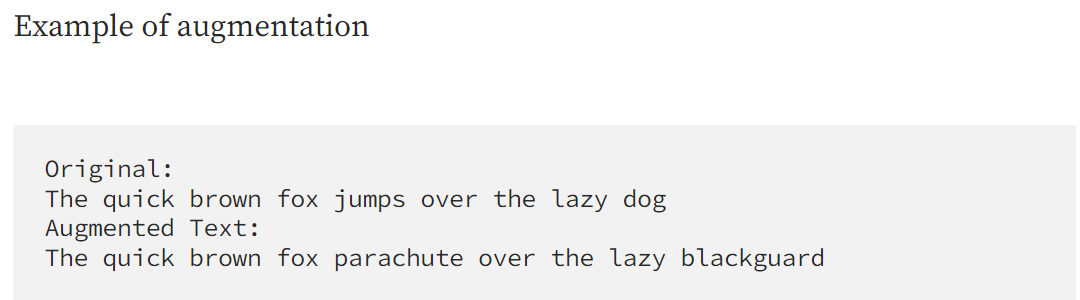

- **Random Word** :

So far we do not introduce deletion in word level. RandomWordAug can help to remove a word randomly.

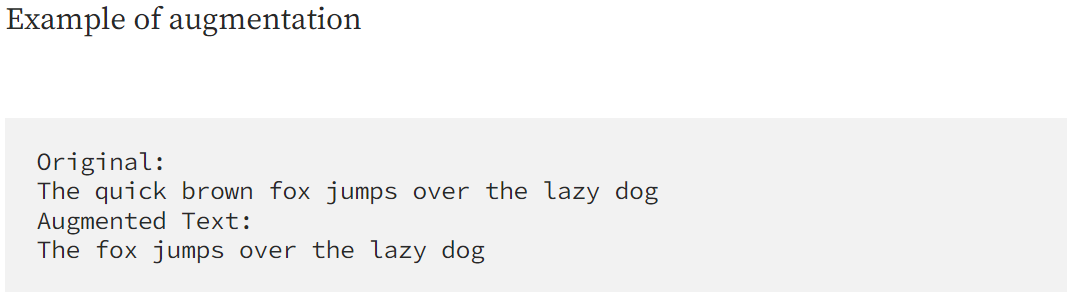

#### 3 - Flow

Up to here, the above augmenters can be invoked alone. What if you want to combine multiple augmenters together? To make use of multiple augmentations, sequential and sometimes pipelines are introduced to connect augmenters. A single text can go though different augmenters to generate diversity of data.

- **Sequential** : 

You can add as much as augmenter you want to this flow and Sequential executes them one by one. For example, you can combine RandomCharAug and RandomWordAug together.

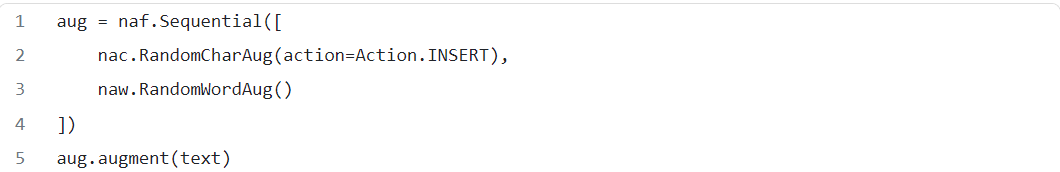

- **Sometimes** 

If you do not want to execute the same set of augmenters all the time, sometimes will pick some of the augmenters every time.

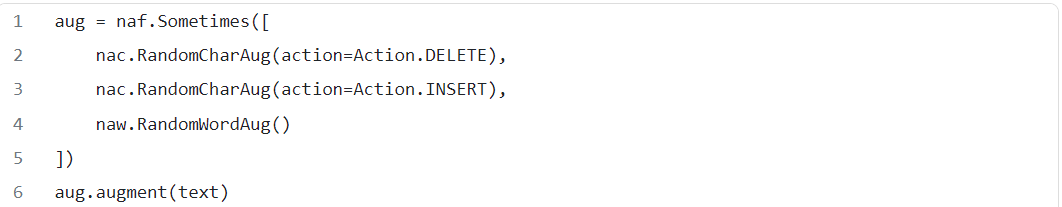